##  Question 1 (50 pts)
Implement K-means clustering on insurance dataset (insurance_data.csv). 

Use Min-Max scaler and the Elbow Method to find the optimum K.

## Answer:

C:\Users\dmashirapov\AppData\Local\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dmashirapov\AppData\Local\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dmashirapov\AppData\Local\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dmashirapov\AppData\Local\anaconda4\Lib\site-packages\sklearn\clust

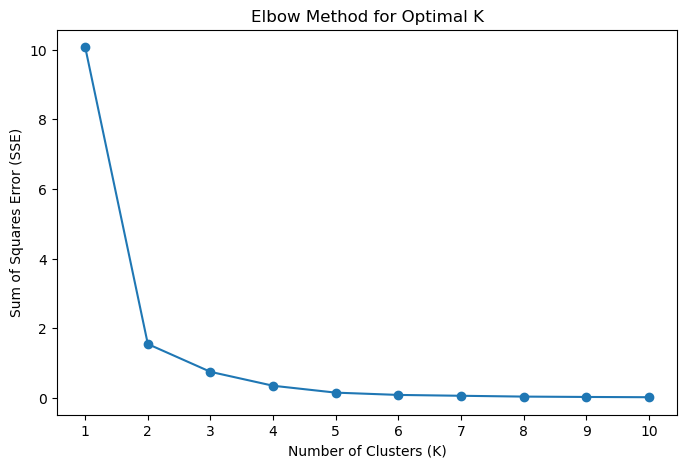

    age  bought_insurance  Cluster
0    22                 0        0
1    25                 0        0
2    47                 1        1
3    52                 0        0
4    46                 1        1
5    56                 1        1
6    55                 0        0
7    60                 1        1
8    62                 1        1
9    61                 1        1
10   18                 0        0
11   28                 0        0
12   27                 0        0
13   29                 0        0
14   49                 1        1
15   55                 1        1
16   25                 1        1
17   58                 1        1
18   19                 0        0
19   18                 0        0
20   21                 0        0
21   26                 0        0
22   40                 1        1
23   45                 1        1
24   50                 1        1
25   54                 1        1
26   23                 0        0


C:\Users\dmashirapov\AppData\Local\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = 'insurance_data.csv'
data = pd.read_csv(file_path)

# Apply Min-Max Scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Determine the optimal number of clusters using the Elbow Method
sse = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)  # Inertia = SSE

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squares Error (SSE)')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_values)
plt.show()

# Applying K-Means with the optimal K
k_optimal = 2  # Assume elbow suggests K=2
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Show the clustered data
print(data)

## Question 2 (50 pts)
KNN has been used to estimate house prices based on 3 variables:
1) number of rooms
2) size in m²
3) age of house
Use K=1 and K=2 to predict prices for the test dataset.

## Answer: 

In [3]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

# Training dataset
data = pd.DataFrame({
    'Price': [500000, 800000, 1000000, 350000, 100000],
    'Rooms': [2, 3, 6, 2, 2],
    'Size': [45, 65, 100, 30, 25],
    'Age': [25, 30, 40, 20, 20]
})

X_train = data[['Rooms', 'Size', 'Age']]
y_train = data['Price']

# Test dataset
X_test = pd.DataFrame({
    'Rooms': [4, 1],
    'Size': [100, 60],
    'Age': [25, 20]
})

# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply KNN for K=1 and K=2
for k in [1, 2]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    predictions = knn.predict(X_test_scaled)
    print(f"Predictions for K={k}: {predictions}")


Predictions for K=1: [800000. 500000.]
Predictions for K=2: [650000. 425000.]
